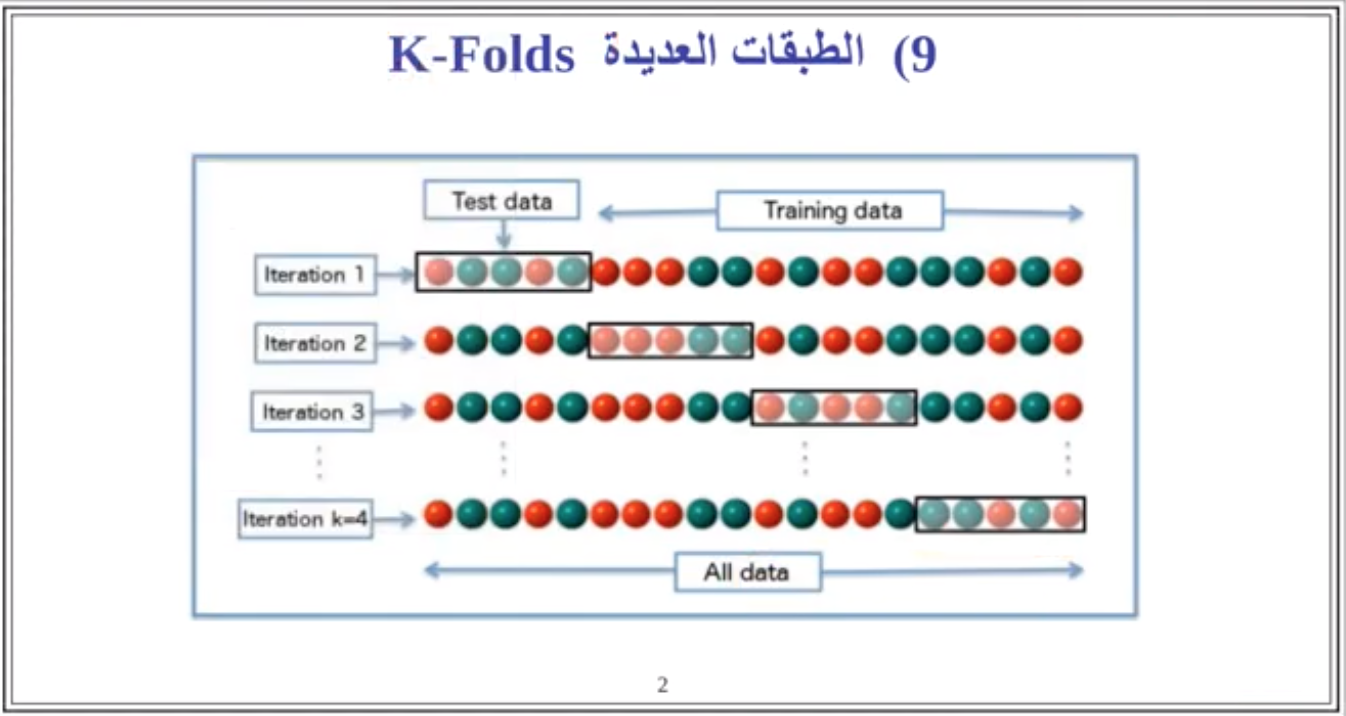

In [1]:
from IPython.display import Image
Image(filename='1.png')

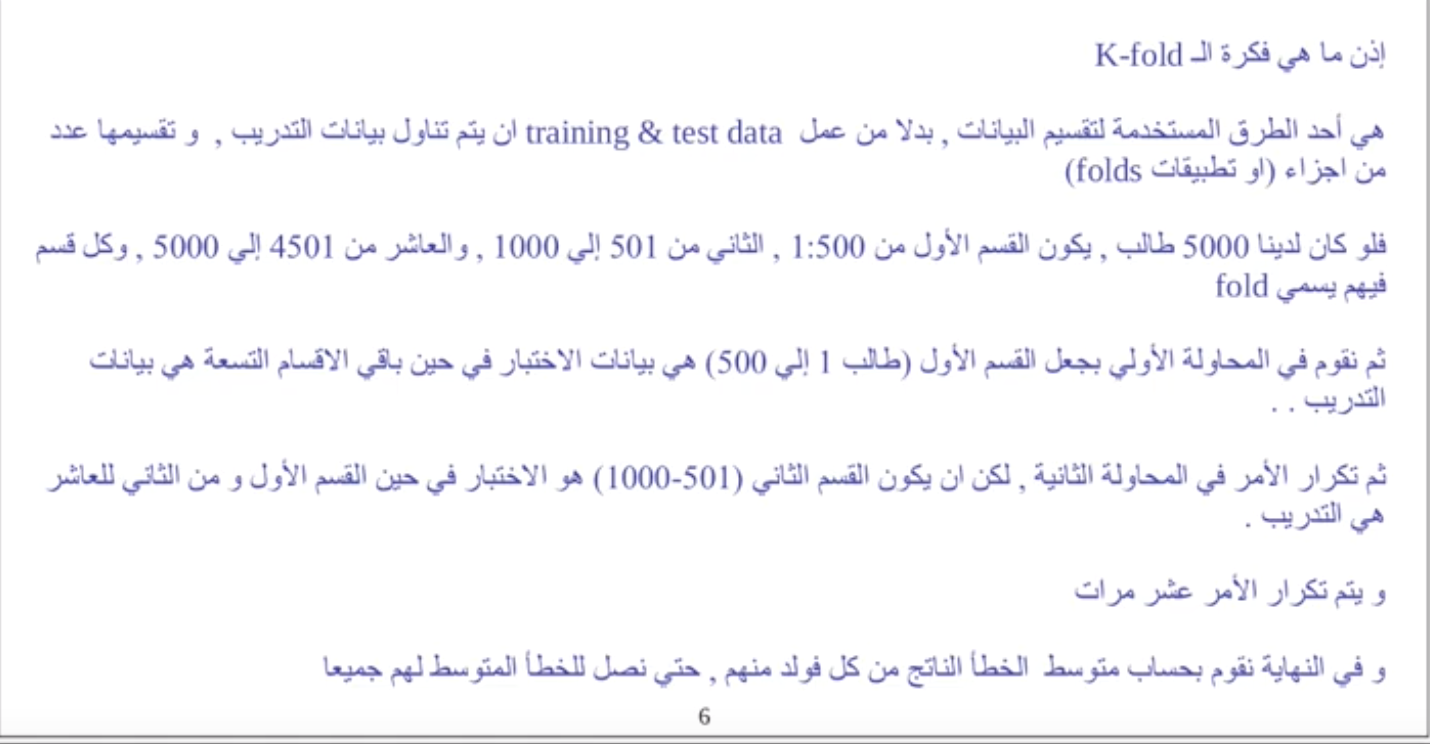

In [2]:
Image(filename='2.png')

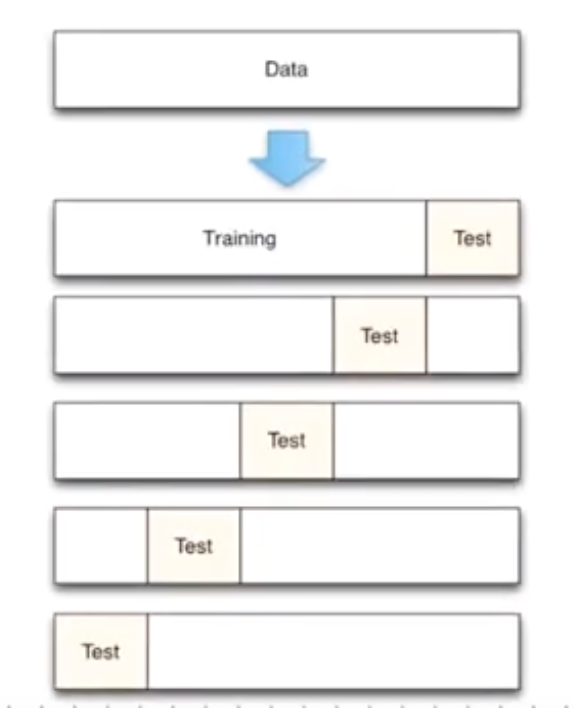

In [3]:
Image(filename='3.png')

# Model Check
* 1- model_selection.cross_validate
* 2- model_selection.cross_val_predict
* 3- model_selection.cross_val_score


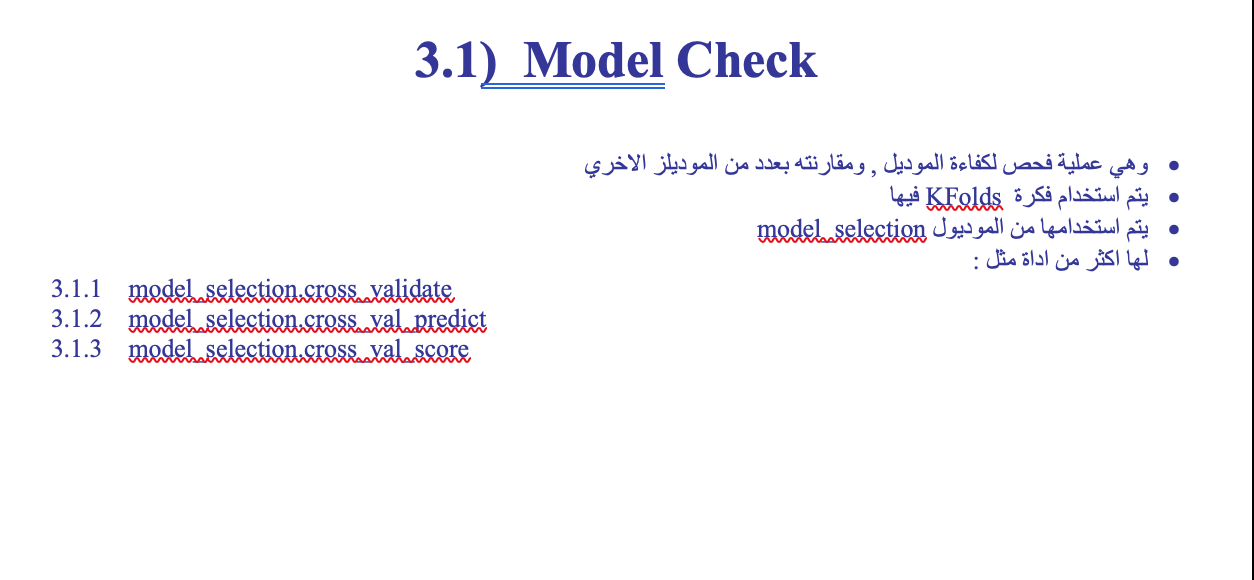

In [4]:
Image(filename='4.png')

## 1- model_selection.cross_validate

In [25]:
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import cross_validate
from sklearn.datasets import load_boston
from sklearn.datasets import load_diabetes


### Example 1

In [9]:
#load boston data

BostonData = load_boston()

#X Data
X = BostonData.data

#y Data
y = BostonData.target


In [10]:
#Applying SGDRegressor Model 

SGDRegressionModel = SGDRegressor(alpha=0.1,random_state=33,penalty='l2',loss = 'huber')


In [14]:
#Applying Cross Validate :  
CrossValidateValues1 = cross_validate(SGDRegressionModel,X,y,cv=3,return_train_score = True)
CrossValidateValues2 = cross_validate(SGDRegressionModel,X,y,cv=3,scoring=('r2','neg_mean_squared_error'))


In [23]:
# Showing Results
print('Train Score Value : ', CrossValidateValues1['train_score'])
print('Test Score Value : ', CrossValidateValues1['test_score'])
print('Fit Time : ', CrossValidateValues1['fit_time'])
print('Score Time : ', CrossValidateValues1['score_time'])


Train Score Value :  [ -0.21992102 -17.05390598  -8.17921027]
Test Score Value :  [ -0.71593304  -3.00339436 -30.19928859]
Fit Time :  [0.00202799 0.00215507 0.00101686]
Score Time :  [0.00050211 0.00090313 0.00041199]


### Example 2

In [29]:
diabetes = load_diabetes()
X = diabetes.data[:150]
y = diabetes.target[:150]
reg= LinearRegression()

In [33]:
cv_results = cross_validate(reg, X, y, cv=3)


In [34]:
for key in cv_results.keys():
    print('value of ' , key , ' is  ' , cv_results[key])


value of  fit_time  is   [0.00111699 0.00075197 0.00085616]
value of  score_time  is   [0.00085902 0.00066113 0.00060487]
value of  test_score  is   [0.49843203 0.1037956  0.44394338]


In [35]:
scores = cross_validate(reg, X, y, cv=5,
                        scoring=('r2', 'neg_mean_squared_error'),
                        return_train_score=True)

print('details are  : \n' , scores)


details are  : 
 {'fit_time': array([0.00097203, 0.00081778, 0.00082207, 0.00064111, 0.00061893]), 'score_time': array([0.00116181, 0.0007422 , 0.00051093, 0.00069571, 0.00070405]), 'test_r2': array([0.36324841, 0.28239194, 0.4211776 , 0.30071196, 0.61240533]), 'train_r2': array([0.54476057, 0.56725566, 0.52199461, 0.57510556, 0.48152388]), 'test_neg_mean_squared_error': array([-2547.29219945, -4523.25983124, -2301.49369105, -4378.07848216,
       -2409.19372015]), 'train_neg_mean_squared_error': array([-2763.25250044, -2366.58455451, -2820.72094475, -2314.72468334,
       -2761.84417475])}


## 2- model_selection.cross_val_predict

In [37]:
from sklearn import datasets

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_predict




In [39]:
diabetes = datasets.load_diabetes()
X = diabetes.data[:50]
y = diabetes.target[:50]



model1 = LinearRegression()
model2 = SVR(gamma = 'auto')
model3 = DecisionTreeRegressor()
model4 = RandomForestRegressor(n_estimators = 20)



models = [model1 , model2 , model3 , model4]

x=0
for m in models:
    x+=1
    
    for n in range(2,5):
        print('result of model number : ' , x ,' for cv value ',n,' is \n' , cross_val_predict(m, X, y, cv=n))  
        print('-----------------------------------')
    print('=====================================')
    print('=====================================')




result of model number :  1  for cv value  2  is 
 [222.63586684  62.03517472 192.99508851 155.30849993  97.98129754
 105.88231599  30.39765285  23.94956613 134.98602554 299.22337137
  81.44935376  62.34221891  99.65931655 184.45665486  95.48909245
 130.31908415 263.87342409 161.60098463 137.59552693 113.92390086
 111.09647147  37.2723054   61.57235338 561.60879329 156.57569748
 194.19948463  55.5117227   81.80605411 203.60502348 107.55664196
 131.98194697 118.86348372  37.72740542  -1.71093622 109.19245416
  76.10479136 229.15442668 158.02968448 207.61556662 175.16686609
  57.21746508  61.76883542 138.87318259 -13.80631288 167.46781506
 124.88500142 211.21355948 188.85144081  46.96201274 167.84249816]
-----------------------------------
result of model number :  1  for cv value  3  is 
 [235.44942928  68.77400226 200.65526763 145.52816417 105.36308378
 135.81502156  31.7587629   49.17396202 141.24297256 250.6307391
  63.93716533  21.20809566 111.81024985 185.17073477 122.09431743
 149

## 3- model_selection.cross_val_score

### Example 1

In [45]:
#load boston data

BostonData = load_boston()

#X Data
X = BostonData.data
#y Data
y = BostonData.target

#----------------------------------------------------
#Splitting data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=44, shuffle =True)


#----------------------------------------------------
#Applying DecisionTreeRegressor Model 


DecisionTreeRegressorModel = DecisionTreeRegressor( max_depth=3,random_state=33)

#----------------------------------------------------
#Applying Cross Validate Score :  
'''
model_selection.cross_val_score(estimator,X,y=None,groups=None,scoring=None,cv=’warn’,n_jobs=None,verbose=0,
                                fit_params=None,pre_dispatch=‘2*n_jobs’,error_score=’raise-deprecating’)
'''

#  don't forget to define the model first !!!
CrossValidateScoreTrain = cross_val_score(DecisionTreeRegressorModel, X_train, y_train, cv=3)
CrossValidateScoreTest = cross_val_score(DecisionTreeRegressorModel, X_test, y_test, cv=3)

# Showing Results
print('Cross Validate Score for Training Set: \n', CrossValidateScoreTrain)
print('Cross Validate Score for Testing Set: \n', CrossValidateScoreTest)

Cross Validate Score for Training Set: 
 [0.5644523  0.49307458 0.74018203]
Cross Validate Score for Testing Set: 
 [0.52549637 0.72618676 0.73558736]


### Example 2

In [44]:

diabetes = datasets.load_diabetes()
X = diabetes.data[:150]
y = diabetes.target[:150]

model1 = LinearRegression()
model2 = SVR(gamma = 'auto')
model3 = DecisionTreeRegressor()
model4 = RandomForestRegressor(n_estimators = 100)

models = [model1 , model2 , model3 , model4]

x=0
for m in models:
    x+=1
    
    for n in range(2,11):
        print('result of model number : ' , x ,' for cv value ',n,' is ' , cross_val_score(m, X, y, cv=n))  
        print('-----------------------------------')
    print('=====================================')
    print('=====================================')




result of model number :  1  for cv value  2  is  [0.22894213 0.39992624]
-----------------------------------
result of model number :  1  for cv value  3  is  [0.49843203 0.1037956  0.44394338]
-----------------------------------
result of model number :  1  for cv value  4  is  [0.46947189 0.16763736 0.06192742 0.51579538]
-----------------------------------
result of model number :  1  for cv value  5  is  [0.36324841 0.28239194 0.4211776  0.30071196 0.61240533]
-----------------------------------
result of model number :  1  for cv value  6  is  [0.4205979  0.54445412 0.04701742 0.11832953 0.32818162 0.63724511]
-----------------------------------
result of model number :  1  for cv value  7  is  [ 0.48599615  0.49350663 -0.00360562  0.46674647 -0.00584799  0.46930127
  0.6141927 ]
-----------------------------------
result of model number :  1  for cv value  8  is  [0.49344366 0.42253878 0.09377165 0.39719696 0.04408174 0.2326275
 0.47736046 0.65522643]
---------------------------